In [3]:
import os
import time
from scipy.stats import (
    anderson,
    chi2_contingency,
    f_oneway,
    friedmanchisquare,
    kendalltau,
    kruskal,
    mannwhitneyu,
    normaltest,
    pearsonr,
    shapiro,
    spearmanr,
    ttest_ind,
    ttest_rel,
    wilcoxon,
)

import pandas as pd
import numpy as np
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib as mpl
# mpl.use('Qt5Agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
"""Load data as data frame"""
src_train = '/home/melandur/Data/Myocarditis/csv/train/7_merged/'
src_test = '/home/melandur/Data/Myocarditis/csv/test/7_merged/'


def load_data(path):
    files = os.listdir(path)
    df_store = {}
    for file in files:
        if 'aha' in file and 'sample' not in file:
            file_path = os.path.join(path, file)
            df = pd.read_excel(file_path)
            name = f"{'_'.join(file.split('_')[1:3])}_{file.split('_')[-1]}".split('.xlsx')[0]
            if not 'global' in file:
                df_store[name] = df.iloc[1:, 1:]  # drop first column and row
    return df_store

df_train = load_data(src_train)
df_test = load_data(src_test)

In [179]:
def euclider(store, name, min=30, max=31):
    euclid_store = {}
    for idx in range(1, 17):
        df_longit = store[f'longit_{name}_{idx}'].iloc[:, min:max]
        df_circumf = store[f'circumf_{name}_{idx}'].iloc[:, min:max]
        df_radial = store[f'radial_{name}_{idx}'].iloc[:, min:max]

        # euclid distance
        df_longit = abs(df_longit) ** 2
        df_circumf = abs(df_circumf) ** 2
        df_radial = abs(df_radial) ** 2
        summed = df_longit + df_circumf.values + df_radial.values
        clean = summed ** (1 / 2)
        euclid_store[f'{idx}'] = clean
    return euclid_store

df_e_train_s = euclider(df_train, 'strain')
df_e_test_s = euclider(df_test, 'strain')
#
df_e_train_v = euclider(df_train, 'velocity')
df_e_test_v = euclider(df_test, 'velocity')

df_e_train_a = euclider(df_train, 'acceleration')
df_e_test_a = euclider(df_test, 'acceleration')


# sns.boxplot(data=test, ax=axes[1])

# print('######')
# print(f'{train.mean()} - {test.mean()}')
# print(f'{train.median()} - {test.median()}')
# print(f'{train.std()} - {test.std()}')

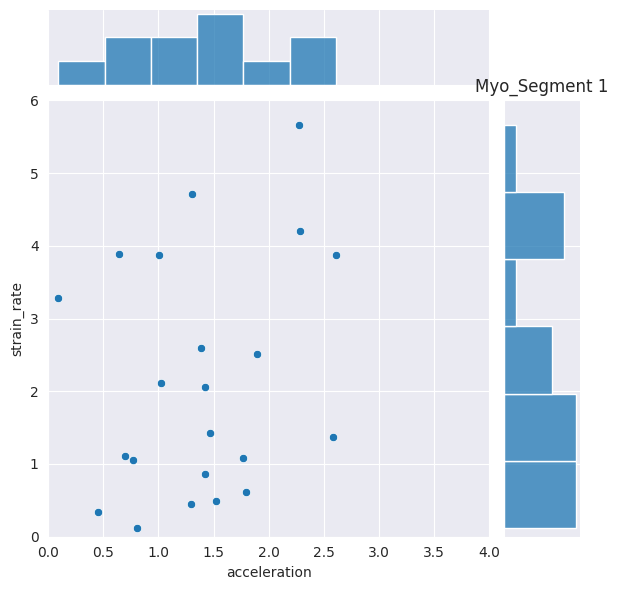

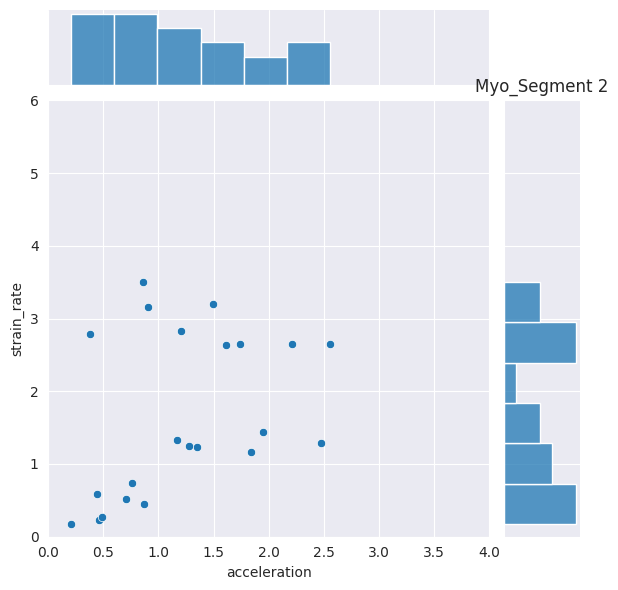

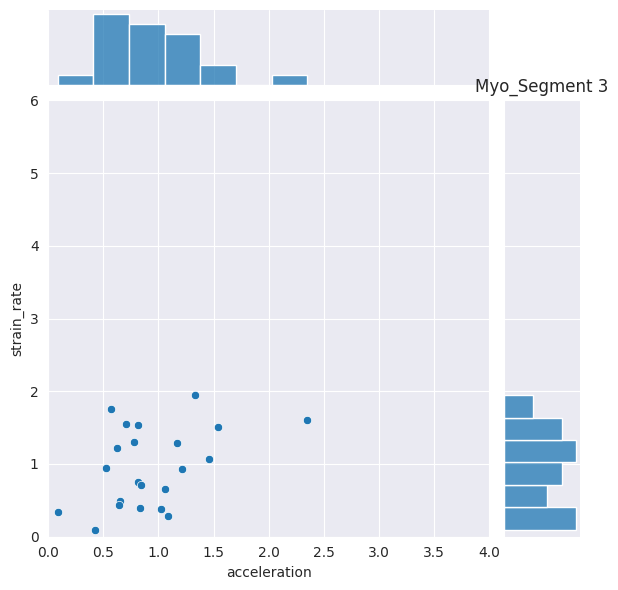

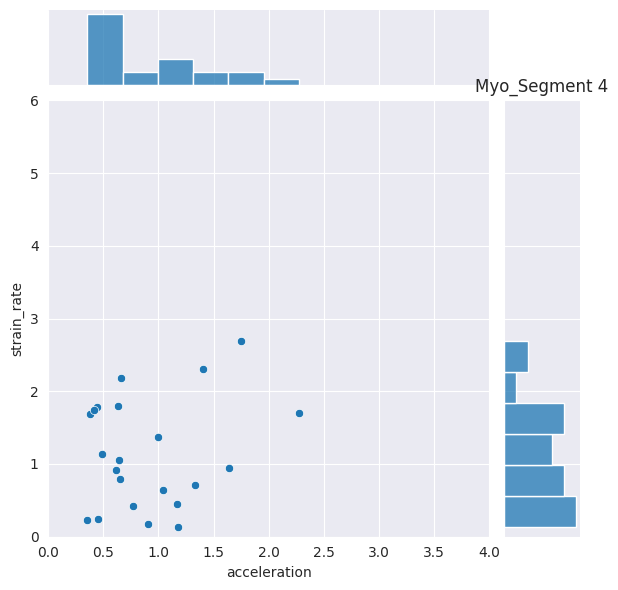

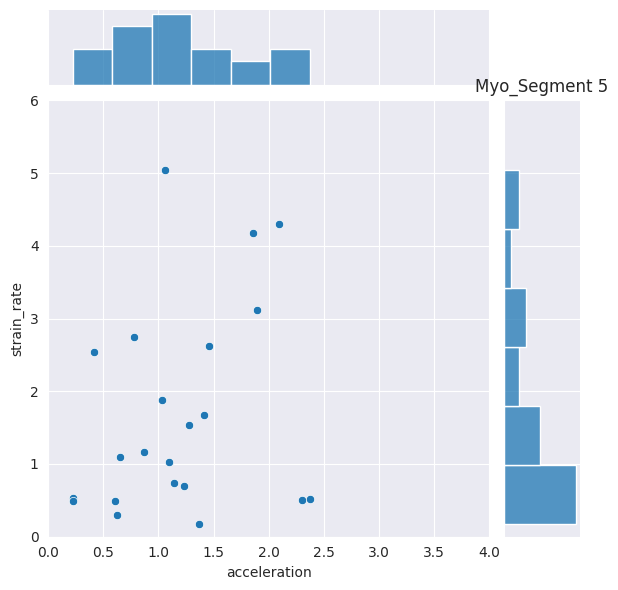

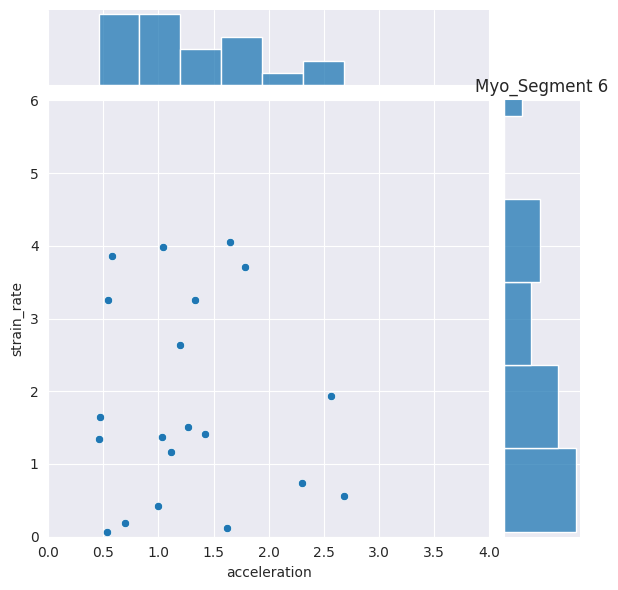

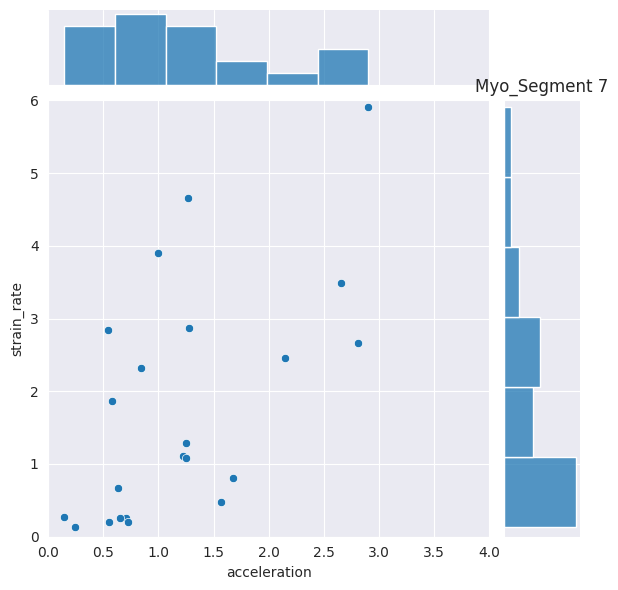

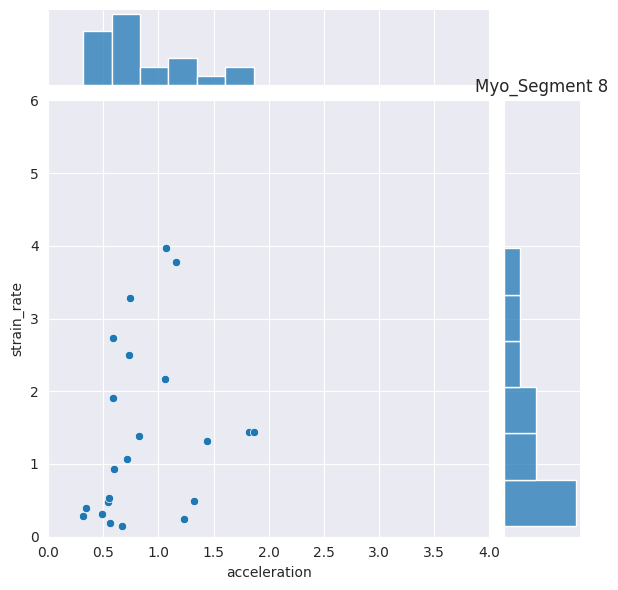

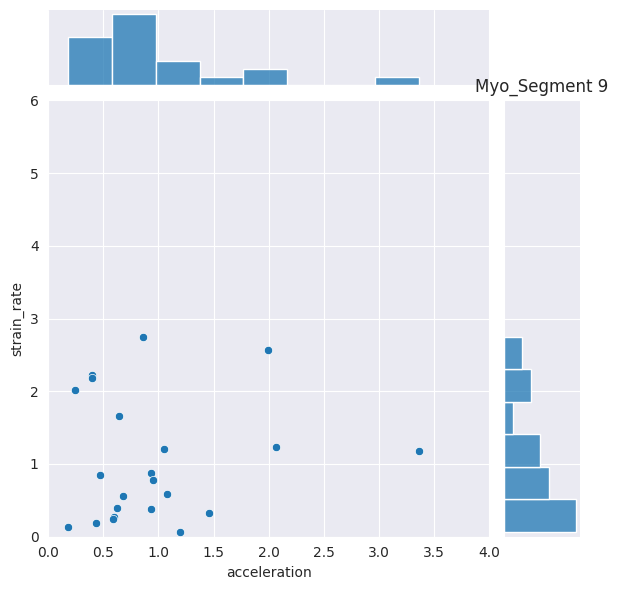

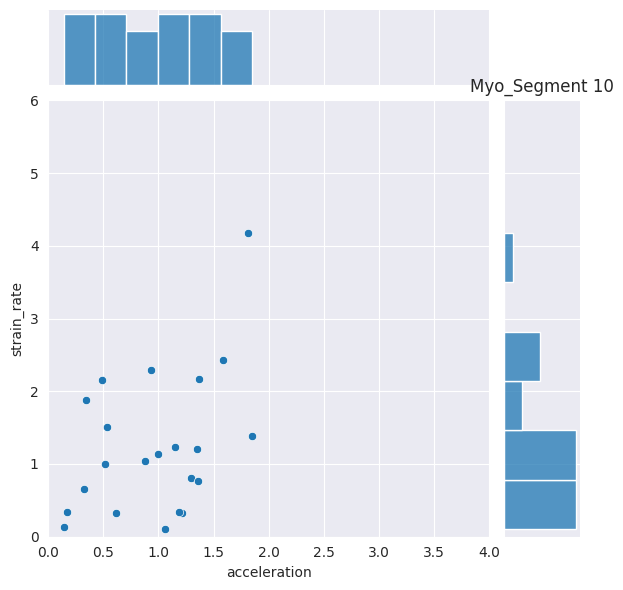

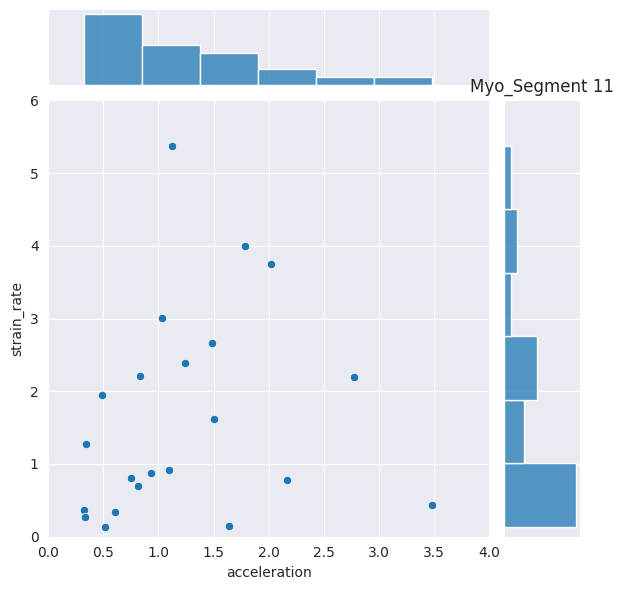

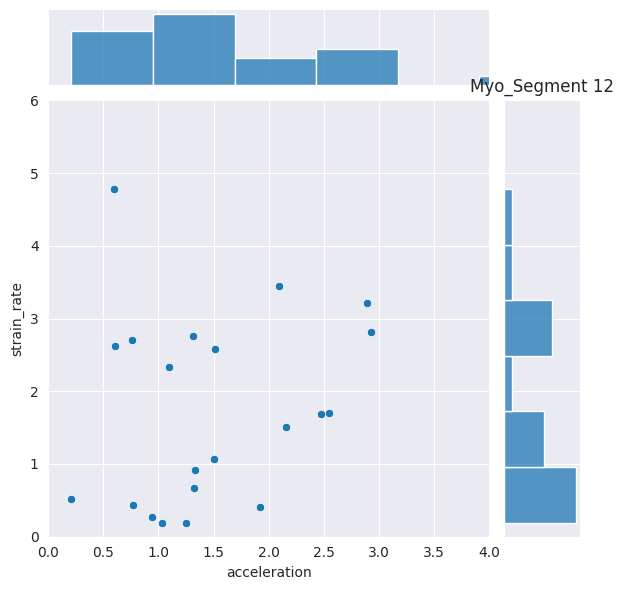

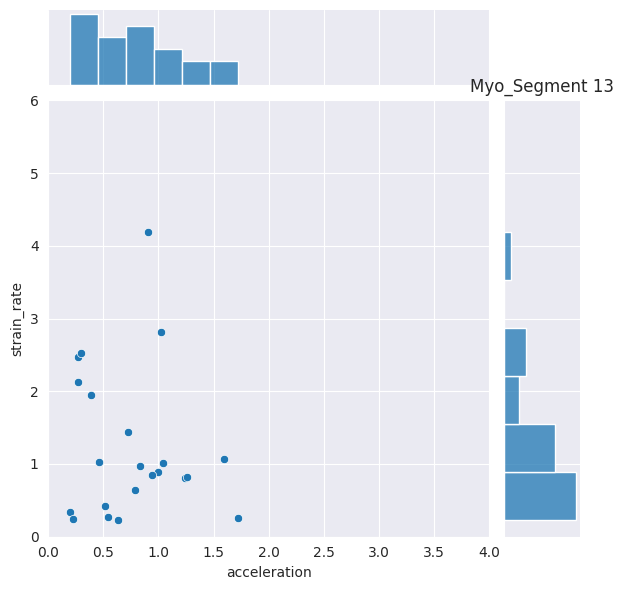

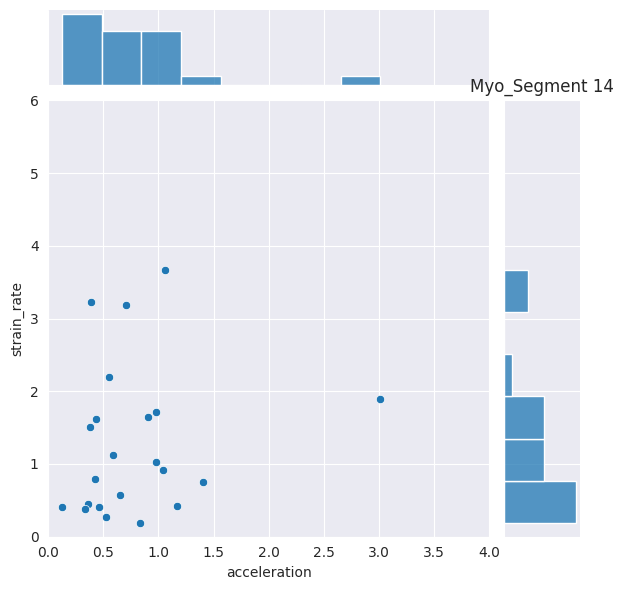

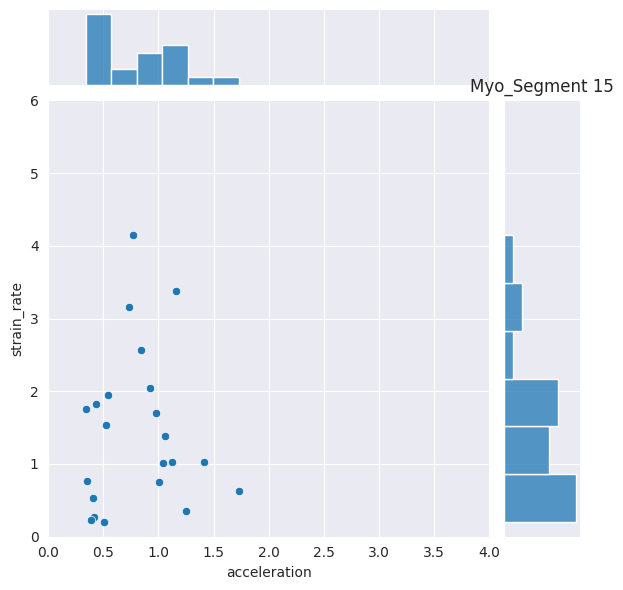

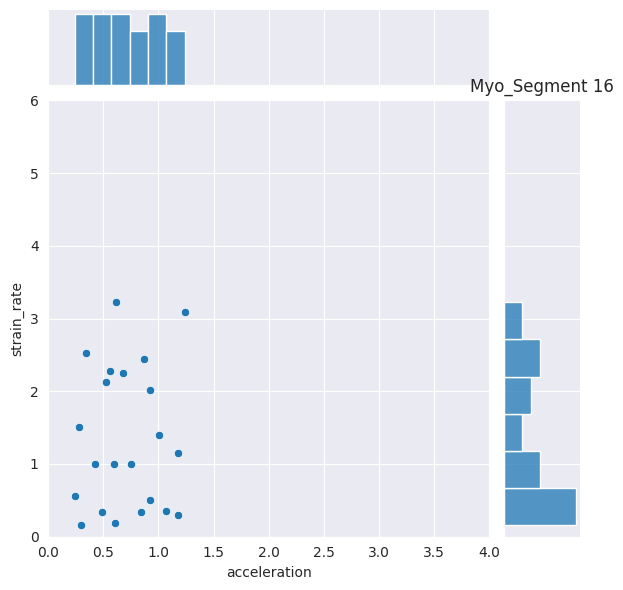

In [182]:
def get_data(i):
    x = df_e_train_s[f'{i}']
    x = x.drop(x.tail(1).index).melt()
    train_s = x.drop(x.columns[x.columns.str.contains('variable', case=False)], axis=1)['value']
    y = df_e_test_s[f'{i}']
    y = y.drop(y.tail(1).index).melt()
    test_s = y.drop(y.columns[y.columns.str.contains('variable', case=False)], axis=1)['value']

    x = df_e_train_v[f'{i}']
    x = x.drop(x.tail(1).index).melt()
    train_v = x.drop(x.columns[x.columns.str.contains('variable', case=False)], axis=1)['value']
    y = df_e_test_v[f'{i}']
    y = y.drop(y.tail(1).index).melt()
    test_v = y.drop(y.columns[y.columns.str.contains('variable', case=False)], axis=1)['value']

    x = df_e_train_a[f'{i}']
    x = x.drop(x.tail(1).index).melt()
    train_a = x.drop(x.columns[x.columns.str.contains('variable', case=False)], axis=1)['value']
    y = df_e_test_a[f'{i}']
    y = y.drop(y.tail(1).index).melt()
    test_a = y.drop(y.columns[y.columns.str.contains('variable', case=False)], axis=1)['value']

    train = pd.concat((train_v, train_s, train_a), axis=1)
    train.columns = ['velocity', 'strain_rate', 'acceleration']
    test = pd.concat((test_v, test_s, test_a), axis=1)
    test.columns = ['velocity', 'strain_rate', 'acceleration']
    return train, test

    # train = pd.concat((df_e_train_v[f'{i}'].iloc[:, 0], df_e_train_s[f'{i}'].iloc[:, 0]), axis=1)
    # train.columns = ['velocity', 'strain_rate']
    # test = pd.concat((df_e_test_v[f'{i}'].iloc[:, 1], df_e_test_s[f'{i}'].iloc[:, 1]), axis=1)
    # test.columns = ['velocity', 'strain_rate']


    # test.acceleration.plot()

    # fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True, sharex=True)
    # for ax in axes[:]:
    # plt.xlim(0,6)
    # plt.ylim(0,200)

    # plt.subplot(int(f'33{x}'))
    # train = pd.concat((df_e_train_v[f'{i}'].iloc[:, x], df_e_train_s[f'{i}'].iloc[:, x]), axis=1)
    # train.columns = ['velocity', 'strain_rate']
    # sns.scatterplot(train.strain_rate, train.velocity)
    # plt.title('myocarditis')

    # for x in range(1, 10):
        # plt.subplot(int(f'33{x}'))
    # train = pd.concat((train_a, test_s), axis=1)
    # train.columns = ['velocity', 'strain_rate']

def get_max_limits():
    x_max, y_max = [], []
    for i in range(1, 17):
        train, test = get_data(i)
        x_max.append(train.acceleration.max())
        y_max.append(train.strain_rate.max())
    return int(max(x_max)), int((max(y_max)))


for i in range(1, 17):
    train, test = get_data(i)
    x_max, y_max = get_max_limits()
    p = sns.jointplot(x=train.acceleration, y=train.strain_rate, xlim=(0, x_max), ylim=(0, y_max))
    plt.title(f'Myo_Segment {i}')


    # sns.jointplot(test.acceleration, test.velocity, xlim=(0,2), ylim=(0,50))
    # plt.title(f'Cont_Segment {i}')
    # plt.xlim(0,3)
    # plt.ylim(0,50)

    # sns.scatterplot(train.acceleration, train.velocity)
    # sns.scatterplot(test.acceleration, test.strain_rate)
    # plt.title('myocarditis')

    # plt.subplot(122)
    # plt.title('control')
    # sns.scatterplot(test.strain_rate, test.velocity)
    plt.show()
